# Aula 5 - Grafos 2

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Grafos com NetworkX

_________

## 1) Grafos com networkx

Na aula de hoje, vamos aprender como usar a biblioteca [NetworkX!](https://networkx.org/) para a análise de grafos/redes em Python!

<img src="https://networkx.org/_static/networkx_logo.svg">

Primeiramente, se ainda não tiver instalado, instale a biblioteca com:

`!pip install networkx==2.6.3`

`!pip install --upgrade networkx`

In [1]:
import networkx as nx

__________

Para vermos como a networkx funciona na prática, vamos resolver os primeiros exercícios da lista, que são bem simples, e servirão perfeitamente para introduzir a sintaxe da biblioteca!

__________

**1)** Implemente o grafo ilustrado pela figura abaixo, utilizando a representação baseada em uma matriz de adjacências. Em seguida, exiba a matriz que representa o grafo.

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/c5b98cc3-2c85-4d9a-b1e8-aaa4b1aba9b3.png width=300>

A classe para um grafo de mão dupla é `Graph()`:

In [11]:
g1 = nx.Graph()

In [12]:
g1

In [13]:
vars(g1)

{'graph_attr_dict_factory': dict,
 'node_dict_factory': dict,
 'node_attr_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {},
 '_node': {},
 '_adj': {}}

Para adicionarmos vértices ao grafo, utilizamos o método `.add_node()`:

In [14]:
g1.add_node(0)
g1.add_node(1)
g1.add_node(2)
g1.add_node(3)
g1.add_node(4)
g1.add_node(5)
g1.add_node(6)

# for i in range(7):
#     g1.add_node(i)

In [15]:
vars(g1)

{'graph_attr_dict_factory': dict,
 'node_dict_factory': dict,
 'node_attr_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {},
 '_node': {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}},
 '_adj': {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}}}

O método `.add_edge()` cria arestas:

In [16]:
g1.add_edge(1, 3)

g1.add_edge(2, 3)
g1.add_edge(2, 5)

g1.add_edge(3, 4)

g1.add_edge(4, 5)
g1.add_edge(4, 6)

g1.add_edge(5, 5)
g1.add_edge(5, 6)

In [17]:
vars(g1)

{'graph_attr_dict_factory': dict,
 'node_dict_factory': dict,
 'node_attr_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {},
 '_node': {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}},
 '_adj': {0: {},
  1: {3: {}},
  2: {3: {}, 5: {}},
  3: {1: {}, 2: {}, 4: {}},
  4: {3: {}, 5: {}, 6: {}},
  5: {2: {}, 4: {}, 5: {}, 6: {}},
  6: {4: {}, 5: {}}}}

In [18]:
g1._adj

{0: {},
 1: {3: {}},
 2: {3: {}, 5: {}},
 3: {1: {}, 2: {}, 4: {}},
 4: {3: {}, 5: {}, 6: {}},
 5: {2: {}, 4: {}, 5: {}, 6: {}},
 6: {4: {}, 5: {}}}

O objeto g1 tem uns atributos importantes:

In [19]:
g1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

In [35]:
# tem um método tambem, de mesmo nome
g1.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6))

In [20]:
g1.number_of_nodes()

7

In [21]:
g1.edges

EdgeView([(1, 3), (2, 3), (2, 5), (3, 4), (4, 5), (4, 6), (5, 5), (5, 6)])

In [22]:
g1.number_of_edges()

8

Para visualizarmos o grafo, existe a função `draw_networkx()`:

In [40]:
nx.__version__a'

'2.6.3'

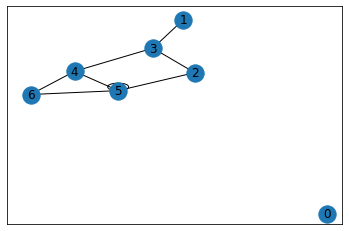

In [45]:
nx.draw_networkx(g1)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/c5b98cc3-2c85-4d9a-b1e8-aaa4b1aba9b3.png width=300>

Toda vez que o método é executado, o grafo aparece em uma posição aleatória. Isso porque o algoritmo de plotagem do networkx se utiliza de seeds aleatórias para a posição inicial do grafo.

É possível entender qual foi a posição escolhida, usando a função `spring_layout()`:

In [66]:
my_pos = nx.spring_layout(g1, seed = 42)

my_pos

{0: array([0.07390872, 1.        ]),
 1: array([0.23132053, 0.08306077]),
 2: array([-0.12042549, -0.07465783]),
 3: array([ 0.07472968, -0.05600028]),
 4: array([ 0.00173165, -0.26583597]),
 5: array([-0.16073083, -0.26408723]),
 6: array([-0.10053426, -0.42247946])}

Se quisermos que essa sempre seja a posição, basta fixarmos a seed e passar esse dicionário pra função de plot, como o argumento `pos`:

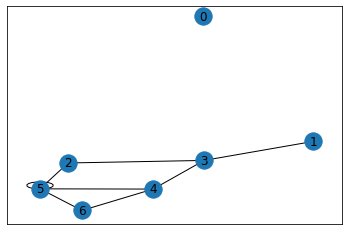

In [79]:
my_pos = nx.spring_layout(g1, seed=42)

nx.draw_networkx(g1, pos=my_pos)

E, claro, podemos fixar à mão, basta mudar os valores no dicionário que é passado pro `pos`:

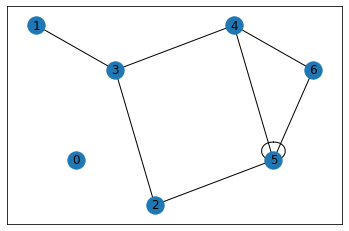

In [89]:
my_pos = {0: [-0.9, 0.4],
          1: [-1, 1],
          2: [-0.7, 0.2],
          3: [-0.8, 0.8],
          4: [-0.5, 1],
          5: [-0.4, 0.4],
          6: [-0.3, 0.8]}

nx.draw_networkx(g1, pos=my_pos)

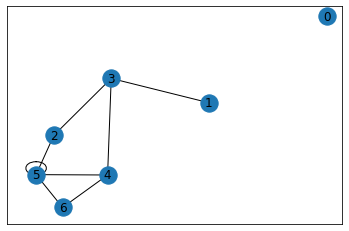

In [88]:
my_pos = {0: [0.5, 0.5        ],
          1: [0.23132053, 0.08306077],
          2: [-0.12042549, -0.07465783],
          3: [ 0.01, 0.2],
          4: [ 0.00173165, -0.26583597],
          5: [-0.16073083, -0.26408723],
          6: [-0.10053426, -0.42247946]}

nx.draw_networkx(g1, pos=my_pos)

Depois vamos ver outros argumentos interessantes pra controlar a aparência do plot -- mas **explore você mesmo**!

Podemos recuperar a matriz de adjacência referente ao grafo:

In [91]:
m1 = nx.adjacency_matrix(g1)

Por padrão, a matriz é representada de maneira esparsa:

In [92]:
m1

<7x7 sparse matrix of type '<class 'numpy.intc'>'
	with 15 stored elements in Compressed Sparse Row format>

Caso se deseje visualizar a matriz completa, densa:

In [95]:
print(m1.todense())

[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 1 0]
 [0 1 1 0 1 0 0]
 [0 0 0 1 0 1 1]
 [0 0 1 0 1 1 1]
 [0 0 0 0 1 1 0]]


<img src=https://s3-sa-east-1.amazonaws.com/lcpi/c5b98cc3-2c85-4d9a-b1e8-aaa4b1aba9b3.png width=300>

Lembrando que os nós aparecem segundo a ordem em que os criamos! 

Esta ordem pode ser visualizada com:

In [94]:
g1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

Também é possível recuperar a lista de adjacência:

In [96]:
g1._adj

{0: {},
 1: {3: {}},
 2: {3: {}, 5: {}},
 3: {1: {}, 2: {}, 4: {}},
 4: {3: {}, 5: {}, 6: {}},
 5: {2: {}, 4: {}, 5: {}, 6: {}},
 6: {4: {}, 5: {}}}

Uma outra forma:

In [97]:
nx.generate_adjlist(g1)

<generator object generate_adjlist at 0x00000215B7D63740>

Uma outra forma:

In [98]:
for item in nx.generate_adjlist(g1):
    
    print(item)

0
1 3
2 3 5
3 4
4 5 6
5 5 6
6


In [99]:
[item for item in nx.generate_adjlist(g1)]

['0', '1 3', '2 3 5', '3 4', '4 5 6', '5 5 6', '6']

In [100]:
nx.adjacency_data(g1)

{'directed': False,
 'multigraph': False,
 'graph': [],
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6}],
 'adjacency': [[],
  [{'id': 3}],
  [{'id': 3}, {'id': 5}],
  [{'id': 1}, {'id': 2}, {'id': 4}],
  [{'id': 3}, {'id': 5}, {'id': 6}],
  [{'id': 2}, {'id': 4}, {'id': 5}, {'id': 6}],
  [{'id': 4}, {'id': 5}]]}

In [104]:
g1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

In [101]:
nx.adjacency_data(g1)["nodes"]

[{'id': 0}, {'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 5}, {'id': 6}]

In [102]:
nx.adjacency_data(g1)["adjacency"]

[[],
 [{'id': 3}],
 [{'id': 3}, {'id': 5}],
 [{'id': 1}, {'id': 2}, {'id': 4}],
 [{'id': 3}, {'id': 5}, {'id': 6}],
 [{'id': 2}, {'id': 4}, {'id': 5}, {'id': 6}],
 [{'id': 4}, {'id': 5}]]

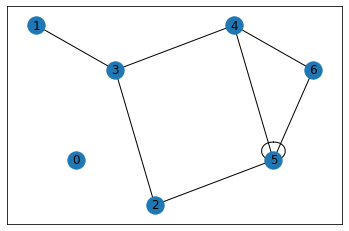

In [103]:
my_pos = {0: [-0.9, 0.4],
          1: [-1, 1],
          2: [-0.7, 0.2],
          3: [-0.8, 0.8],
          4: [-0.5, 1],
          5: [-0.4, 0.4],
          6: [-0.3, 0.8]}

nx.draw_networkx(g1, pos=my_pos)

Caso queiramos percorrer o grafo, o networkx nos disponibiliza [algoritmos de percurso:](https://networkx.org/documentation/stable/reference/algorithms/simple_paths.html)

In [105]:
nx.all_simple_paths(g1, 1, 5)

<generator object _all_simple_paths_graph at 0x00000215B7D632E0>

In [106]:
[caminho for caminho in nx.all_simple_paths(g1, 1, 5)]

[[1, 3, 2, 5], [1, 3, 4, 5], [1, 3, 4, 6, 5]]

In [107]:
[caminho for caminho in nx.all_simple_paths(g1, 0, 5)]

[]

In [108]:
[caminho for caminho in nx.all_simple_paths(g1, 6, 1)]

[[6, 4, 3, 1], [6, 4, 5, 2, 3, 1], [6, 5, 2, 3, 1], [6, 5, 4, 3, 1]]

In [109]:
[caminho for caminho in nx.all_simple_paths(g1, 1, 6)]

[[1, 3, 2, 5, 4, 6], [1, 3, 2, 5, 6], [1, 3, 4, 5, 6], [1, 3, 4, 6]]

O networkx também disponibiliza [algoritmos de menor caminho!](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html)

In [110]:
nx.shortest_path(g1, 1, 6)

[1, 3, 4, 6]

E se tiver varios caminhos mair curtos?

In [112]:
[caminho for caminho in nx.all_simple_paths(g1, 1, 5)]

[[1, 3, 2, 5], [1, 3, 4, 5], [1, 3, 4, 6, 5]]

In [118]:
# retorna APENAS 1!
nx.shortest_path(g1, 1, 5)

[1, 3, 2, 5]

In [122]:
# isso é seguro, se vc quiser ter todos os menores caminhos

[path for path in nx.all_shortest_paths(g1, 1, 5)]

[[1, 3, 2, 5], [1, 3, 4, 5]]

_____________

**2)** Implemente o grafo ilustrado pela figura abaixo, utilizando a representação baseada em uma lista de adjacências. Em seguida, observe a lista de adjacências que representa o grafo.

<img src=https://ycpcs.github.io/cs360-spring2019/lectures/images/lecture15/digraph.png width=300>

A classe para grafos de não única (grafos direcionais) é a `DiGraph()`:

In [132]:
g2 = nx.DiGraph()

for i in range(1, 6):
    
    g2.add_node(i)
    
g2.add_edge(1, 2)
g2.add_edge(1, 3)
g2.add_edge(1, 4)

g2.add_edge(2, 3)

g2.add_edge(3, 2)

g2.add_edge(4, 4)

g2.add_edge(5, 2)

In [134]:
print(g2._adj)

{1: {2: {}, 3: {}, 4: {}}, 2: {3: {}}, 3: {2: {}}, 4: {4: {}}, 5: {2: {}}}


In [135]:
nx.adjacency_data(g2)["adjacency"]

[[{'id': 2}, {'id': 3}, {'id': 4}],
 [{'id': 3}],
 [{'id': 2}],
 [{'id': 4}],
 [{'id': 2}]]

In [136]:
nx.adjacency_matrix(g2).todense()

matrix([[0, 1, 1, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0]], dtype=int32)

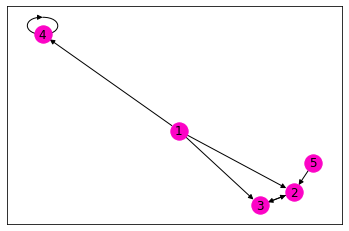

In [144]:
nx.draw_networkx(g2, pos=nx.spring_layout(g2, seed=42), node_color="#fc03c6")

Em um grafo direcionado (mão única), pode ser que caminhos não existam!

In [146]:
[path for path in nx.all_simple_paths(g2, 1, 2)]

[[1, 2], [1, 3, 2]]

In [148]:
[path for path in nx.all_shortest_paths(g2, 1, 2)]

[[1, 2]]

In [147]:
[path for path in nx.all_simple_paths(g2, 1, 5)]

[]

_____________

**3)** Implemente o grafo ponderado ilustrado pela figura abaixo, utilizando as representações baseadas em:

- matriz de adjacências;
- lista de adjacências.

Em seguida, exiba a matriz e a lista que representam o grafo.

<img src="https://ucarecdn.com/a67cb888-aa0c-424b-8c7f-847e38dd5691/" width=300>

Por fim, para representar um grafo ponderado de mão dupla (como o acima), basta usar o parâmetro "weight" no méotodo de adição de nós

In [196]:
g3 = nx.Graph()

for i in range(5):
    
    g3.add_node(i)
    
g3.add_edge(0, 4, weight=8)
g3.add_edge(0, 1, weight=3)
g3.add_edge(0, 3, weight=7)

g3.add_edge(1, 3, weight=4)
g3.add_edge(1, 2, weight=1)

g3.add_edge(2, 3, weight=2)

g3.add_edge(3, 4, weight=3)

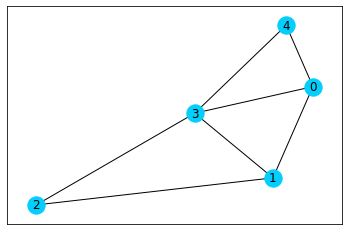

In [197]:
nx.draw_networkx(g3, pos=nx.spring_layout(g3, seed=42), node_color="#03cefc")

As duas representações:

In [198]:
nx.adjacency_matrix(g3).todense()

matrix([[0, 3, 0, 7, 8],
        [3, 0, 1, 4, 0],
        [0, 1, 0, 2, 0],
        [7, 4, 2, 0, 3],
        [8, 0, 0, 3, 0]], dtype=int32)

In [199]:
g3._adj

{0: {4: {'weight': 8}, 1: {'weight': 3}, 3: {'weight': 7}},
 1: {0: {'weight': 3}, 3: {'weight': 4}, 2: {'weight': 1}},
 2: {1: {'weight': 1}, 3: {'weight': 2}},
 3: {0: {'weight': 7}, 1: {'weight': 4}, 2: {'weight': 2}, 4: {'weight': 3}},
 4: {0: {'weight': 8}, 3: {'weight': 3}}}

Caso queira plotar com os pesos:

In [200]:
nx.get_edge_attributes(g3, "weight")

{(0, 4): 8, (0, 1): 3, (0, 3): 7, (1, 3): 4, (1, 2): 1, (2, 3): 2, (3, 4): 3}

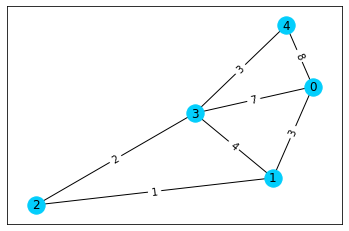

In [201]:
nx.draw_networkx(g3, 
                 pos=nx.spring_layout(g3, seed=42), 
                 node_color="#03cefc")

nx.draw_networkx_edge_labels(g3, 
                             pos=nx.spring_layout(g3, seed=42),
                             edge_labels=nx.get_edge_attributes(g3, "weight"));

Engrossando a largura das ligações proporcionalmente ao peso:

In [204]:
nx.get_edge_attributes(g3, "weight")

{(0, 4): 8, (0, 1): 3, (0, 3): 7, (1, 3): 4, (1, 2): 1, (2, 3): 2, (3, 4): 3}

In [207]:
list(nx.get_edge_attributes(g3, "weight").values())

[8, 3, 7, 4, 1, 2, 3]

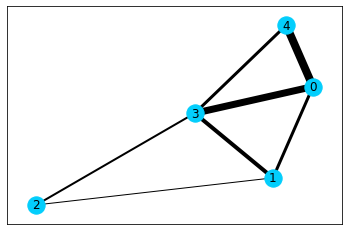

In [211]:
nx.draw_networkx(g3, 
                 pos=nx.spring_layout(g3, seed=42), 
                 node_color="#03cefc",
                 width=list(nx.get_edge_attributes(g3, "weight").values()))

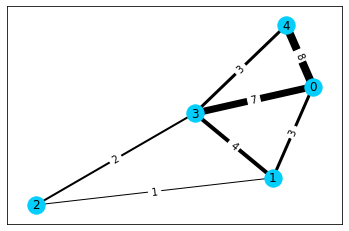

In [210]:
nx.draw_networkx(g3, 
                 pos=nx.spring_layout(g3, seed=42), 
                 node_color="#03cefc",
                 width=list(nx.get_edge_attributes(g3, "weight").values()))

nx.draw_networkx_edge_labels(g3, 
                             pos=nx.spring_layout(g3, seed=42),
                             edge_labels=nx.get_edge_attributes(g3, "weight"));

Vejamos todos os caminhos entre os nós 1 e 4:

In [212]:
[path for path in nx.all_simple_paths(g3, 1, 4)]

[[1, 0, 4],
 [1, 0, 3, 4],
 [1, 3, 0, 4],
 [1, 3, 4],
 [1, 2, 3, 0, 4],
 [1, 2, 3, 4]]

Considerando pesos para o menor caminho, temos dijkstra!

In [214]:
nx.dijkstra_path(g3, 1, 4)

[1, 2, 3, 4]

Caso queira saber o comprimento do menor caminho:

In [215]:
nx.dijkstra_path_length(g3, 1, 4)

6

__________

Agora que já conhecemos o básico da NetworkX, vamos nos aprofundar em algumas outras propriedades de frafos, que são super úteis em uma grande diversidade de problemas!

## Medidas de centralidade

Seria interessante se pudéssemos avaliar o "**quão importantes**" são determinados nó em um grafo, não é mesmo? Pense nos seguintes exemplos:

- "Influenciadores digitais" nas redes sociais;
- Estação da Sé/Luz no sistema de transporte metropolitano de SP;
- O aeroporto London Heathrow Airport (veja detalhes [aqui](https://www.travelctm.asia/blog/the-worlds-top-25-most-connected-airports-2019/)), no sistema aeroviário internacional.

Existe algo de especial nestes nós, dentro do contexto de seus respectivos grafos, não é mesmo? E seria muito legal se pudéssemos **quantificar** esta importância, não é mesmo?

É neste contexto que surgem as chamadas **medidas de centralidade**, que têm como objetivo, dentro de um determinado contexto e/ou aplicação, atribuir a cada nó um "score".

A seguir, amos ver 3 das mais importantes medidas de centralidade!

### Degree (grau)

O **grau (degree) de um nó** é definido como **o número de vizinhos** daquele nó; ou, equivalentemente, **o número de conexões** que um nó faz.

<img src="imgs/degree.PNG" width=400>

Em outras palavras,

- Quanto maior o degree de um nó, mais conexões um nó tem;
- Quanto menor o degree de um nó, menos conexões um nó tem;

Um ponto importante do degree é que esta é uma medida **local**, no sentido de que, ao saber o degree de um dado nó, não sabemos nada sobre o degree de seus vizinhos. Por este motivo, a centralidade dá apenas informações locais, falhando em dar uma informação mais global sobre a rede. Isso é ilustrado, por exemplo, na seguinte figura:

<img src="imgs/degree2.PNG" width=400>

_________

### Closeness (proximidade)

Como o próprio nome indica, a **proximidade (closeness)** de um nó mede a nédia dentre os caminhos mais curtos entre o dado nó e os demais nós acessíveis a partir dele. Ou seja, esta é uma medida que indica o quanto um nó está proximo dos demais. 

<img src="imgs/closeness1.PNG" width=400>

<img src="imgs/closeness2.PNG" width=400>

Em outras palavras,

- Quanto maior a closeness de um nó, mais próximo, em média, ele está dos demais nós.
- Quanto menor a closeness de um nó, mais distante, em média, ele está dos demais nós.

Note que, diferente do degree, a closeness é uma medida com caráter mais global, pois para calculá-la, olhamos para o grafo globalmente, examinando os caminhos mais curtos.

__________

### Betweenness (intermediação)

A medida de centralidade de **intermediação (betweenness)** de um nó e definida como **a fração de caminhos mais curtos que incluem este nó**. Ou seja, esta medida indica o quanto de informação passa pelo nó, isto é, o quanto que ele é "intermediário", no sentido dos caminhos mais curtos. 


<img src="imgs/between.PNG" width=400>


Existe uma interpretação interessante pra betweenness: um nó com alta betweenness é tal que exerce **uma grande influência** entre os nós que ele conecta, de modo que este nó pode ser visto como uma "ponte". Se o nó for alterado ou removido, o efeito terá uma ampla escala, pois, sendo uma "ponte", esta influência é carregada para diferentes porções do grafo.

Em outras palavras,

- Quanto maior a betweenness de um nó, maior é sua influência em nós cujos caminhos passam por ele. Nós que são "pontes" terão alta betweeness.
- Quanto menor a betweenness de um nó, menor é sua influência em nós cujos caminhos passam por ele. Nós nas extremidades do grafo terão baixa betweenness.

___________

Um resumo legal das 3 medidas de centralidade:

<img src="https://image.slidesharecdn.com/icsm-docsym-090919140350-phpapp01/95/changes-and-bugs-mining-and-predicting-development-activities-19-728.jpg?cb=1253447625" width=500>

No [artigo da wikipedia](https://en.wikipedia.org/wiki/Centrality) há mais informações sobre medidas de centralidade. Algo notável é que **há muitas medidas diferentes**! De fato, cada uma foca em um aspecto específico do grafo, tendo sido introduzida em seu respectivo contexto. 

Assim, é verdade que não existe uma medida de centralidade melhor do que as demais. Cada uma mede um aspecto, e por isso, tem seus pontos fortes e pontos fracos, que são, quase sempre, contextuais.

Deste modo, mais importante do que decorar fórmulas para calcular cada umas das medidas, é importante **entender o que elas estão quantificando**, e em que casos é válido usar uma ou outra!

Deixo mais um artigo legal que discute esta questão, que é também de onde tirei as imagens acima -- [veja aqui](https://towardsdatascience.com/notes-on-graph-theory-centrality-measurements-e37d2e49550a)!

Vamos calcular as medidas de centralidade do nosso grafo?

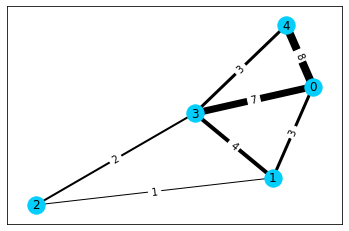

In [216]:
nx.draw_networkx(g3, 
                 pos=nx.spring_layout(g3, seed=42), 
                 node_color="#03cefc",
                 width=list(nx.get_edge_attributes(g3, "weight").values()))

nx.draw_networkx_edge_labels(g3, 
                             pos=nx.spring_layout(g3, seed=42),
                             edge_labels=nx.get_edge_attributes(g3, "weight"));

In [217]:
g3.degree()

DegreeView({0: 3, 1: 3, 2: 2, 3: 4, 4: 2})

In [225]:
# degree normalizado, isto é, dividido pelo maior degree.

nx.degree_centrality(g3)

{0: 0.75, 1: 0.75, 2: 0.5, 3: 1.0, 4: 0.5}

In [220]:
nx.closeness_centrality(g3)

{0: 0.8, 1: 0.8, 2: 0.6666666666666666, 3: 1.0, 4: 0.6666666666666666}

In [221]:
nx.betweenness_centrality(g3)

{0: 0.08333333333333333,
 1: 0.08333333333333333,
 2: 0.0,
 3: 0.3333333333333333,
 4: 0.0}

_______

### Composição de grafos

Ao modelarmos um grafo, o trabalho geralmente é facilitado se focarmos primeiramente em modelar sub-grafos dentro da estrutura, que podem ser posteriormente compostos para gerar o grafo completo!

In [241]:
g1 = nx.Graph()

g1.add_node("a")
g1.add_node("b")
g1.add_node("c")

g1.add_edge("a", "b", weight = 5)
g1.add_edge("b", "c")
g1.add_edge("a", "c")

#######################

g2 = nx.Graph()

g2.add_node("a")
g2.add_node("b")
g2.add_node("d")

g2.add_edge("a", "b", weight = 5)
g2.add_edge("a", "d") 

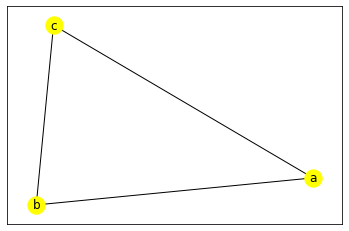

In [242]:
nx.draw_networkx(g1, node_color="yellow")

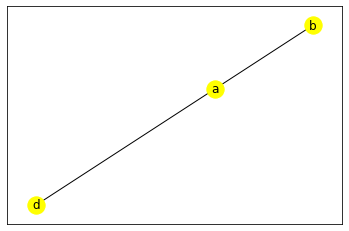

In [243]:
nx.draw_networkx(g2, node_color="yellow")

In [244]:
g3 = nx.compose(g1, g2)

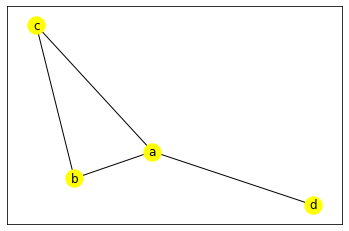

In [245]:
nx.draw_networkx(g3, node_color="yellow")

In [246]:
g3._adj

{'a': {'b': {'weight': 5}, 'c': {}, 'd': {}},
 'b': {'a': {'weight': 5}, 'c': {}},
 'c': {'a': {}, 'b': {}},
 'd': {'a': {}}}

_____
_____
_____

### Desafio "mini projeto": exercício Q4 da lista de grafos!

**4) (DESAFIO!)** O grafo dos estados do Brasil é definido da seguinte forma:

- Cada vértice é um dos estados estados da República Federativa do Brasil
- Dois estados são adjacentes se têm uma fronteira comum

<br>

<img src="https://www.researchgate.net/profile/Paulo-Feofiloff/publication/327057443/figure/fig1/AS:660253444153345@1534428096628/Figura-13-Adjacncia-entre-estados-do-Brasil-veja-exemplo-15.png" width=400>

Implemente o grafo no networkx e responda: 

- Quantos vértices tem o grafo? 

- Quantas arestas? 

- Você consegue plotar o grafo de forma parecida com o real formato do Brasil?

In [ ]:
# mini-projeto!


Pergunta adicional: faça uma função que receba dois estados, e que devolve o menor caminho entre eles (inicialmente, considere um grafo não-ponderado)

In [ ]:
# mini-projeto!


Construa agora um grafo ponderado, usando a [distância entre capitais dos estados](http://www.itatrans.com.br/distancia.html) como pesos! 

Construa novamente a função de menor caminho (como se fosse trechos de avião entre aeroportos das capitais!

In [1]:
# mini-projeto! (o principal desafio aqui é coletar os dados com webscraping!)


__________